In [1]:
import netCDF4
from netCDF4 import Dataset
import sys, os

import numpy as np
import pandas as pd 
# import h5py 
# import xarray as xr

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


In [2]:
!pwd

/home/mikle/ML/Diploma_ocean


In [3]:
my_path = os.path.abspath("./Data")
rootgrp = Dataset(my_path + "/mercatorglorys12v1_gl12_mean_19930101_R19930106.nc", "r", format="NETCDF4")

In [4]:
rootgrp.variables['longitude']

<class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    valid_min: -180.0
    valid_max: 179.91667
    step: 0.08332825
    units: degrees_east
    unit_long: Degrees East
    long_name: Longitude
    standard_name: longitude
    axis: X
unlimited dimensions: 
current shape = (4320,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [5]:
rootgrp.variables

{'longitude': <class 'netCDF4._netCDF4.Variable'>
 float32 longitude(longitude)
     valid_min: -180.0
     valid_max: 179.91667
     step: 0.08332825
     units: degrees_east
     unit_long: Degrees East
     long_name: Longitude
     standard_name: longitude
     axis: X
 unlimited dimensions: 
 current shape = (4320,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude(latitude)
     valid_min: -80.0
     valid_max: 90.0
     step: 0.08333588
     units: degrees_north
     unit_long: Degrees North
     long_name: Latitude
     standard_name: latitude
     axis: Y
 unlimited dimensions: 
 current shape = (2041,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'depth': <class 'netCDF4._netCDF4.Variable'>
 float32 depth(depth)
     valid_min: 0.494025
     valid_max: 5727.917
     units: m
     positive: down
     unit_long: Meters
     long_name: Depth
     standard_name: depth
     axis: Z
 

In [6]:
# print(rootgrp.data_model)

In [7]:
# my_path = os.path.abspath("Data")
# print(my_path)
# ds = xr.open_dataset(my_path + '/1.nc')
# df = ds.to_dataframe()

In [8]:
def decart(s1, s2):
    x = []
    y = []
    for i in s1:
        for j in s2:
            x.append(i)
            y.append(j)
    return x, y

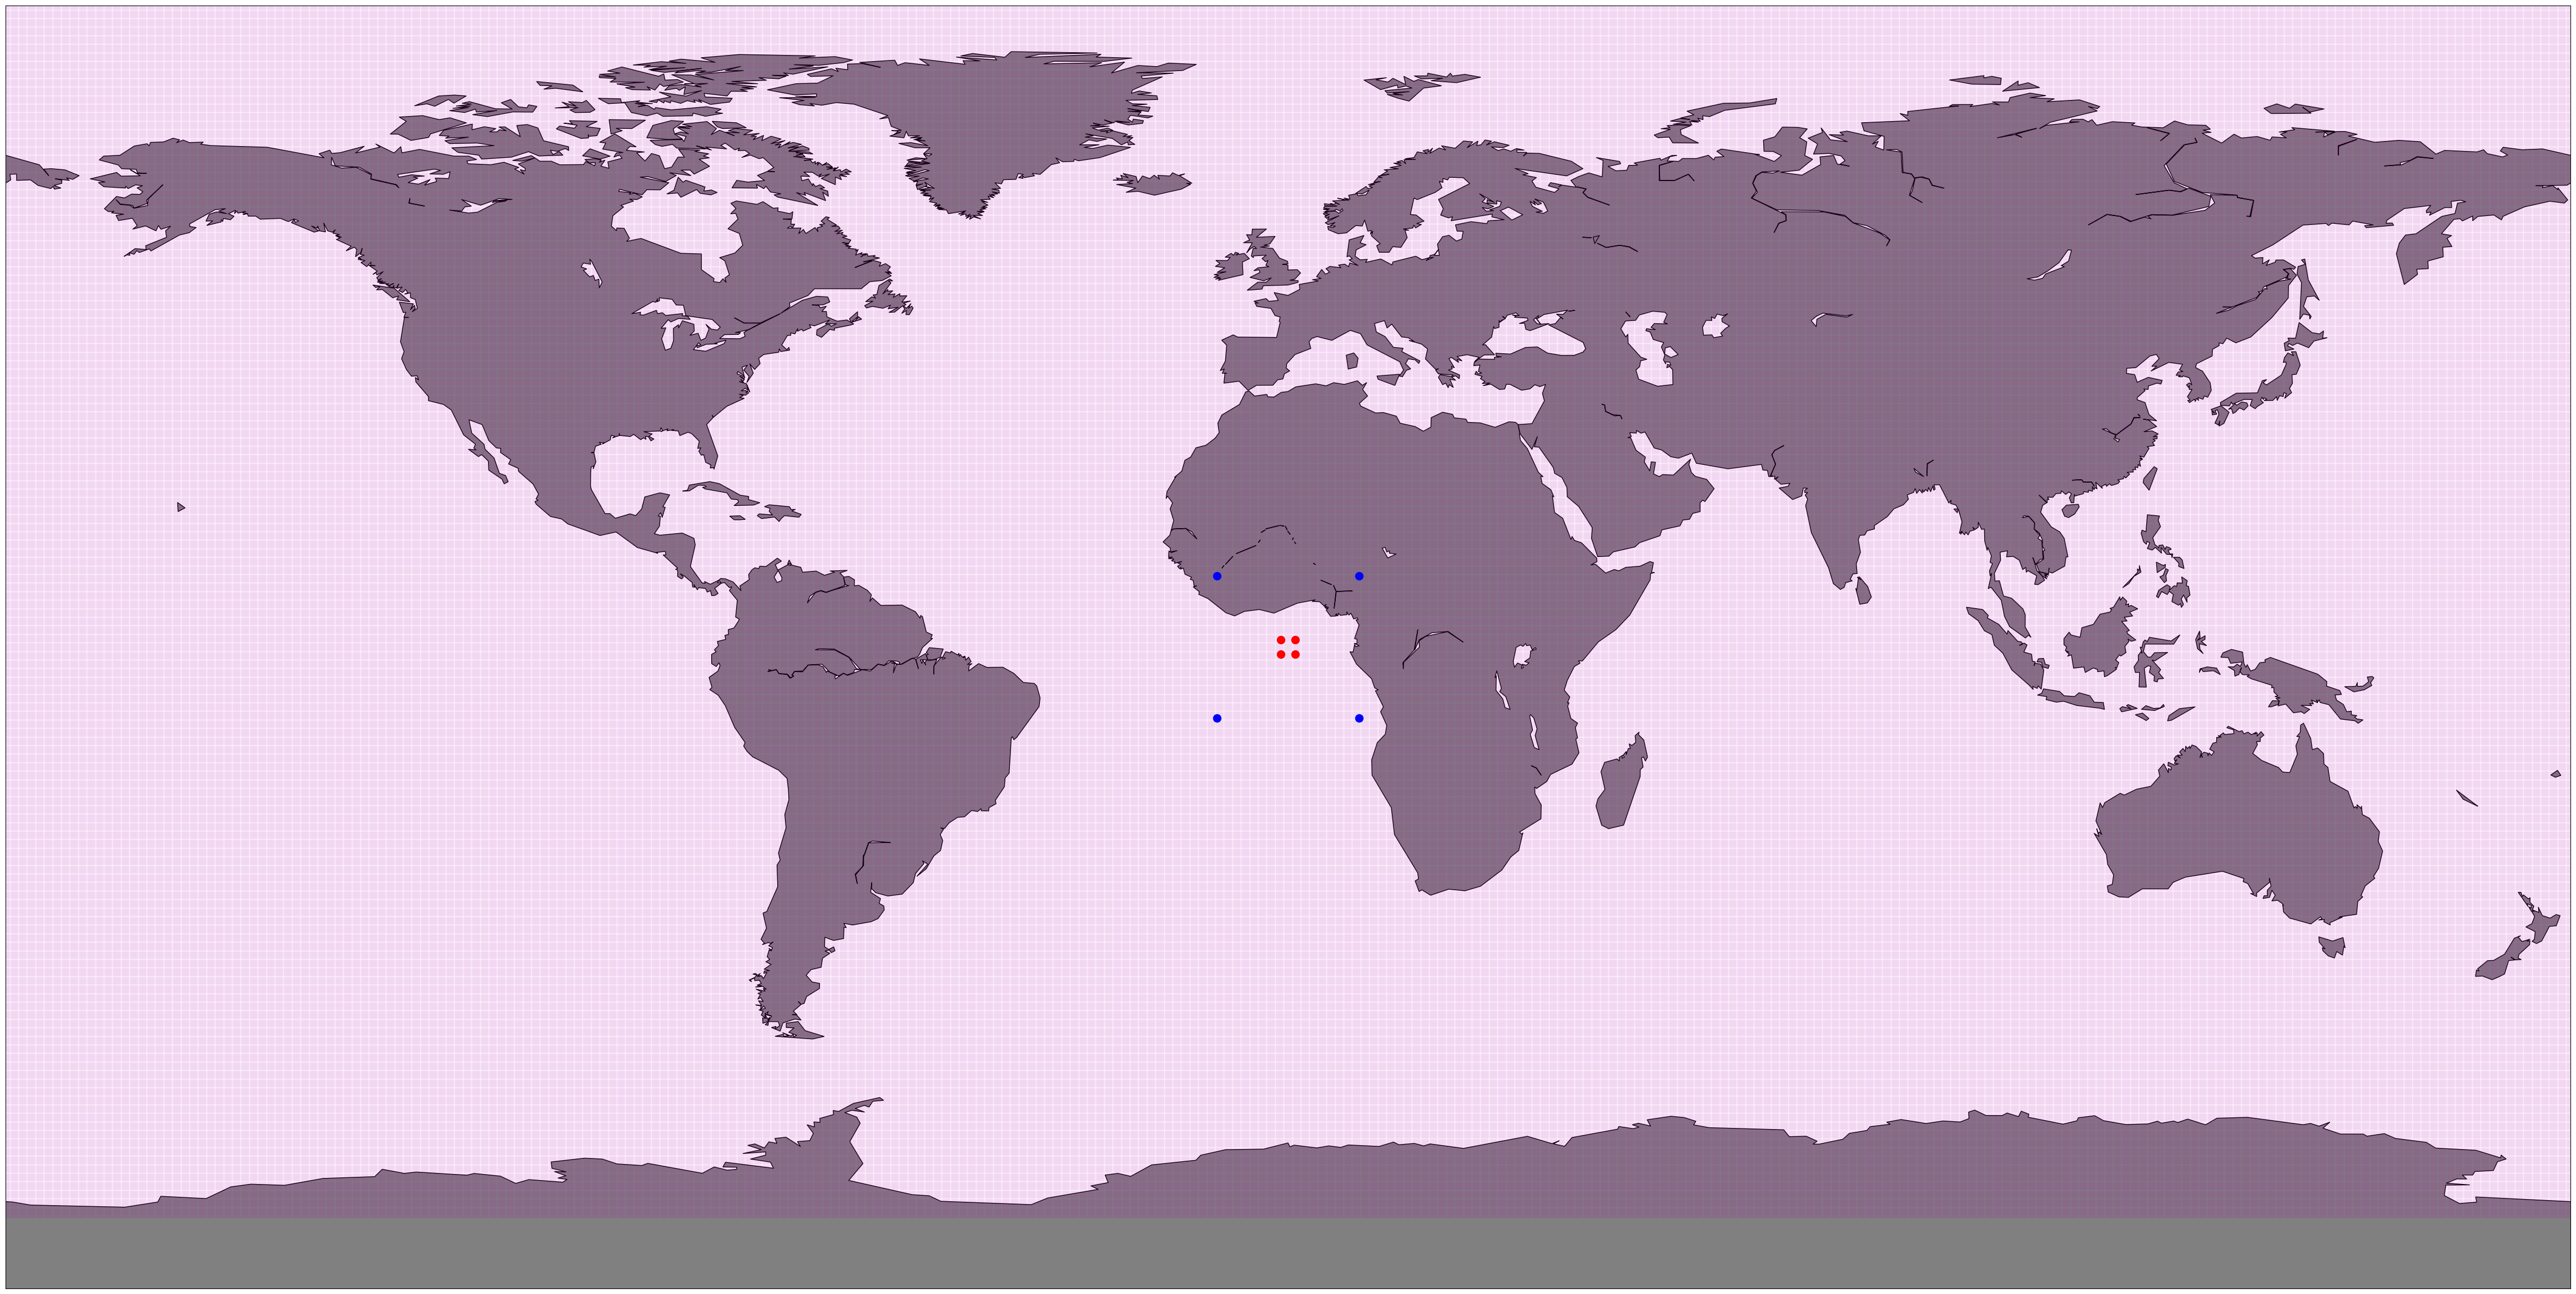

In [9]:
plt.figure(figsize=(60,30))
map = Basemap()

map.drawcoastlines()
map.fillcontinents(color='gray',lake_color='white')

x, y = decart(rootgrp.variables['longitude'][:], rootgrp.variables['latitude'][:])

map.plot(x, y, marker='.', color='m', linestyle='None', markersize='0.05')


a1, a2, = -10, 10
b1, b2 = -10, 10
part_x = [a1, a1, a2, a2]
part_y = [b1, b2, b1, b2]
map.plot(part_x, part_y, marker='.', color='b', linestyle='None', markersize='20')


c1, c2, = -1, 1
d1, d2 = -1, 1
part_x_2 = [c1, c1, c2, c2]
part_y_2 = [d1, d2, d1, d2]
map.plot(part_x_2, part_y_2, marker='.', color='r', linestyle='None', markersize='20')

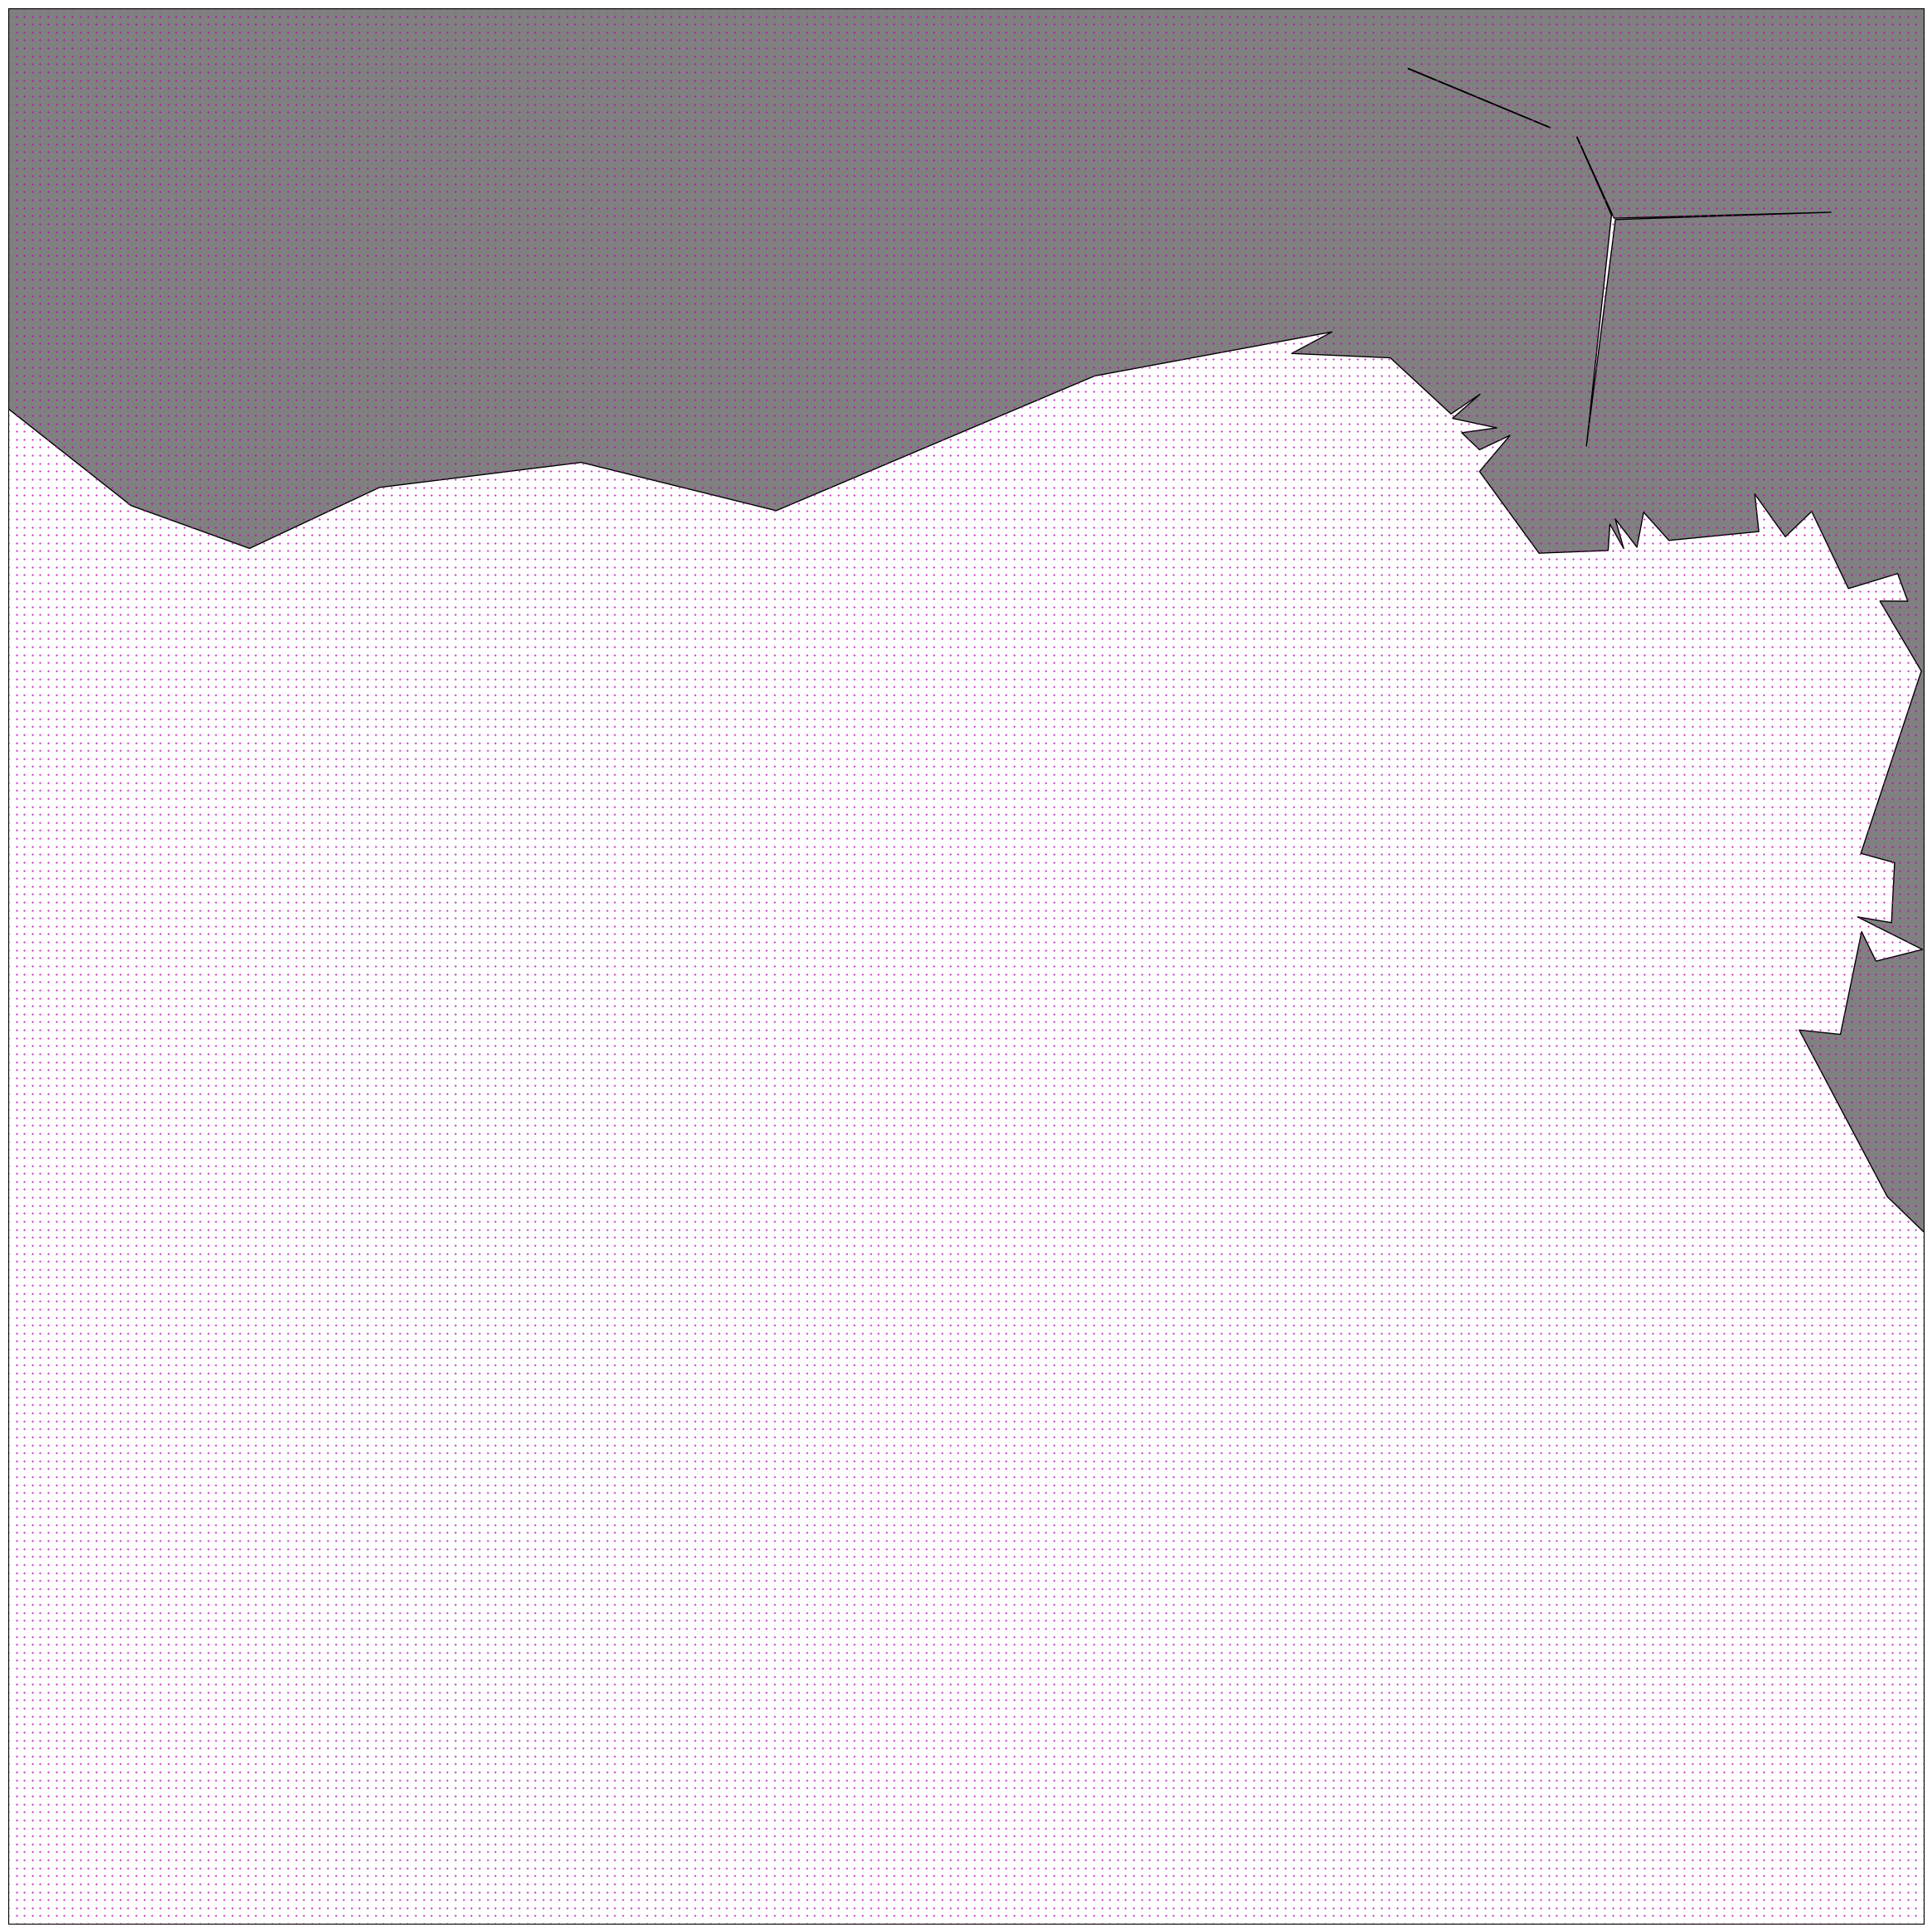

In [10]:
plt.figure(figsize=(60,30))
map = Basemap(llcrnrlat=a1,urcrnrlat=a2,\
            llcrnrlon=b1,urcrnrlon=b2)

map.drawcoastlines()
map.fillcontinents(color='gray',lake_color='white')

x, y = decart(rootgrp.variables['longitude'][:], rootgrp.variables['latitude'][:])

map.plot(x, y, marker='.', color='m', linestyle='None', markersize='1')

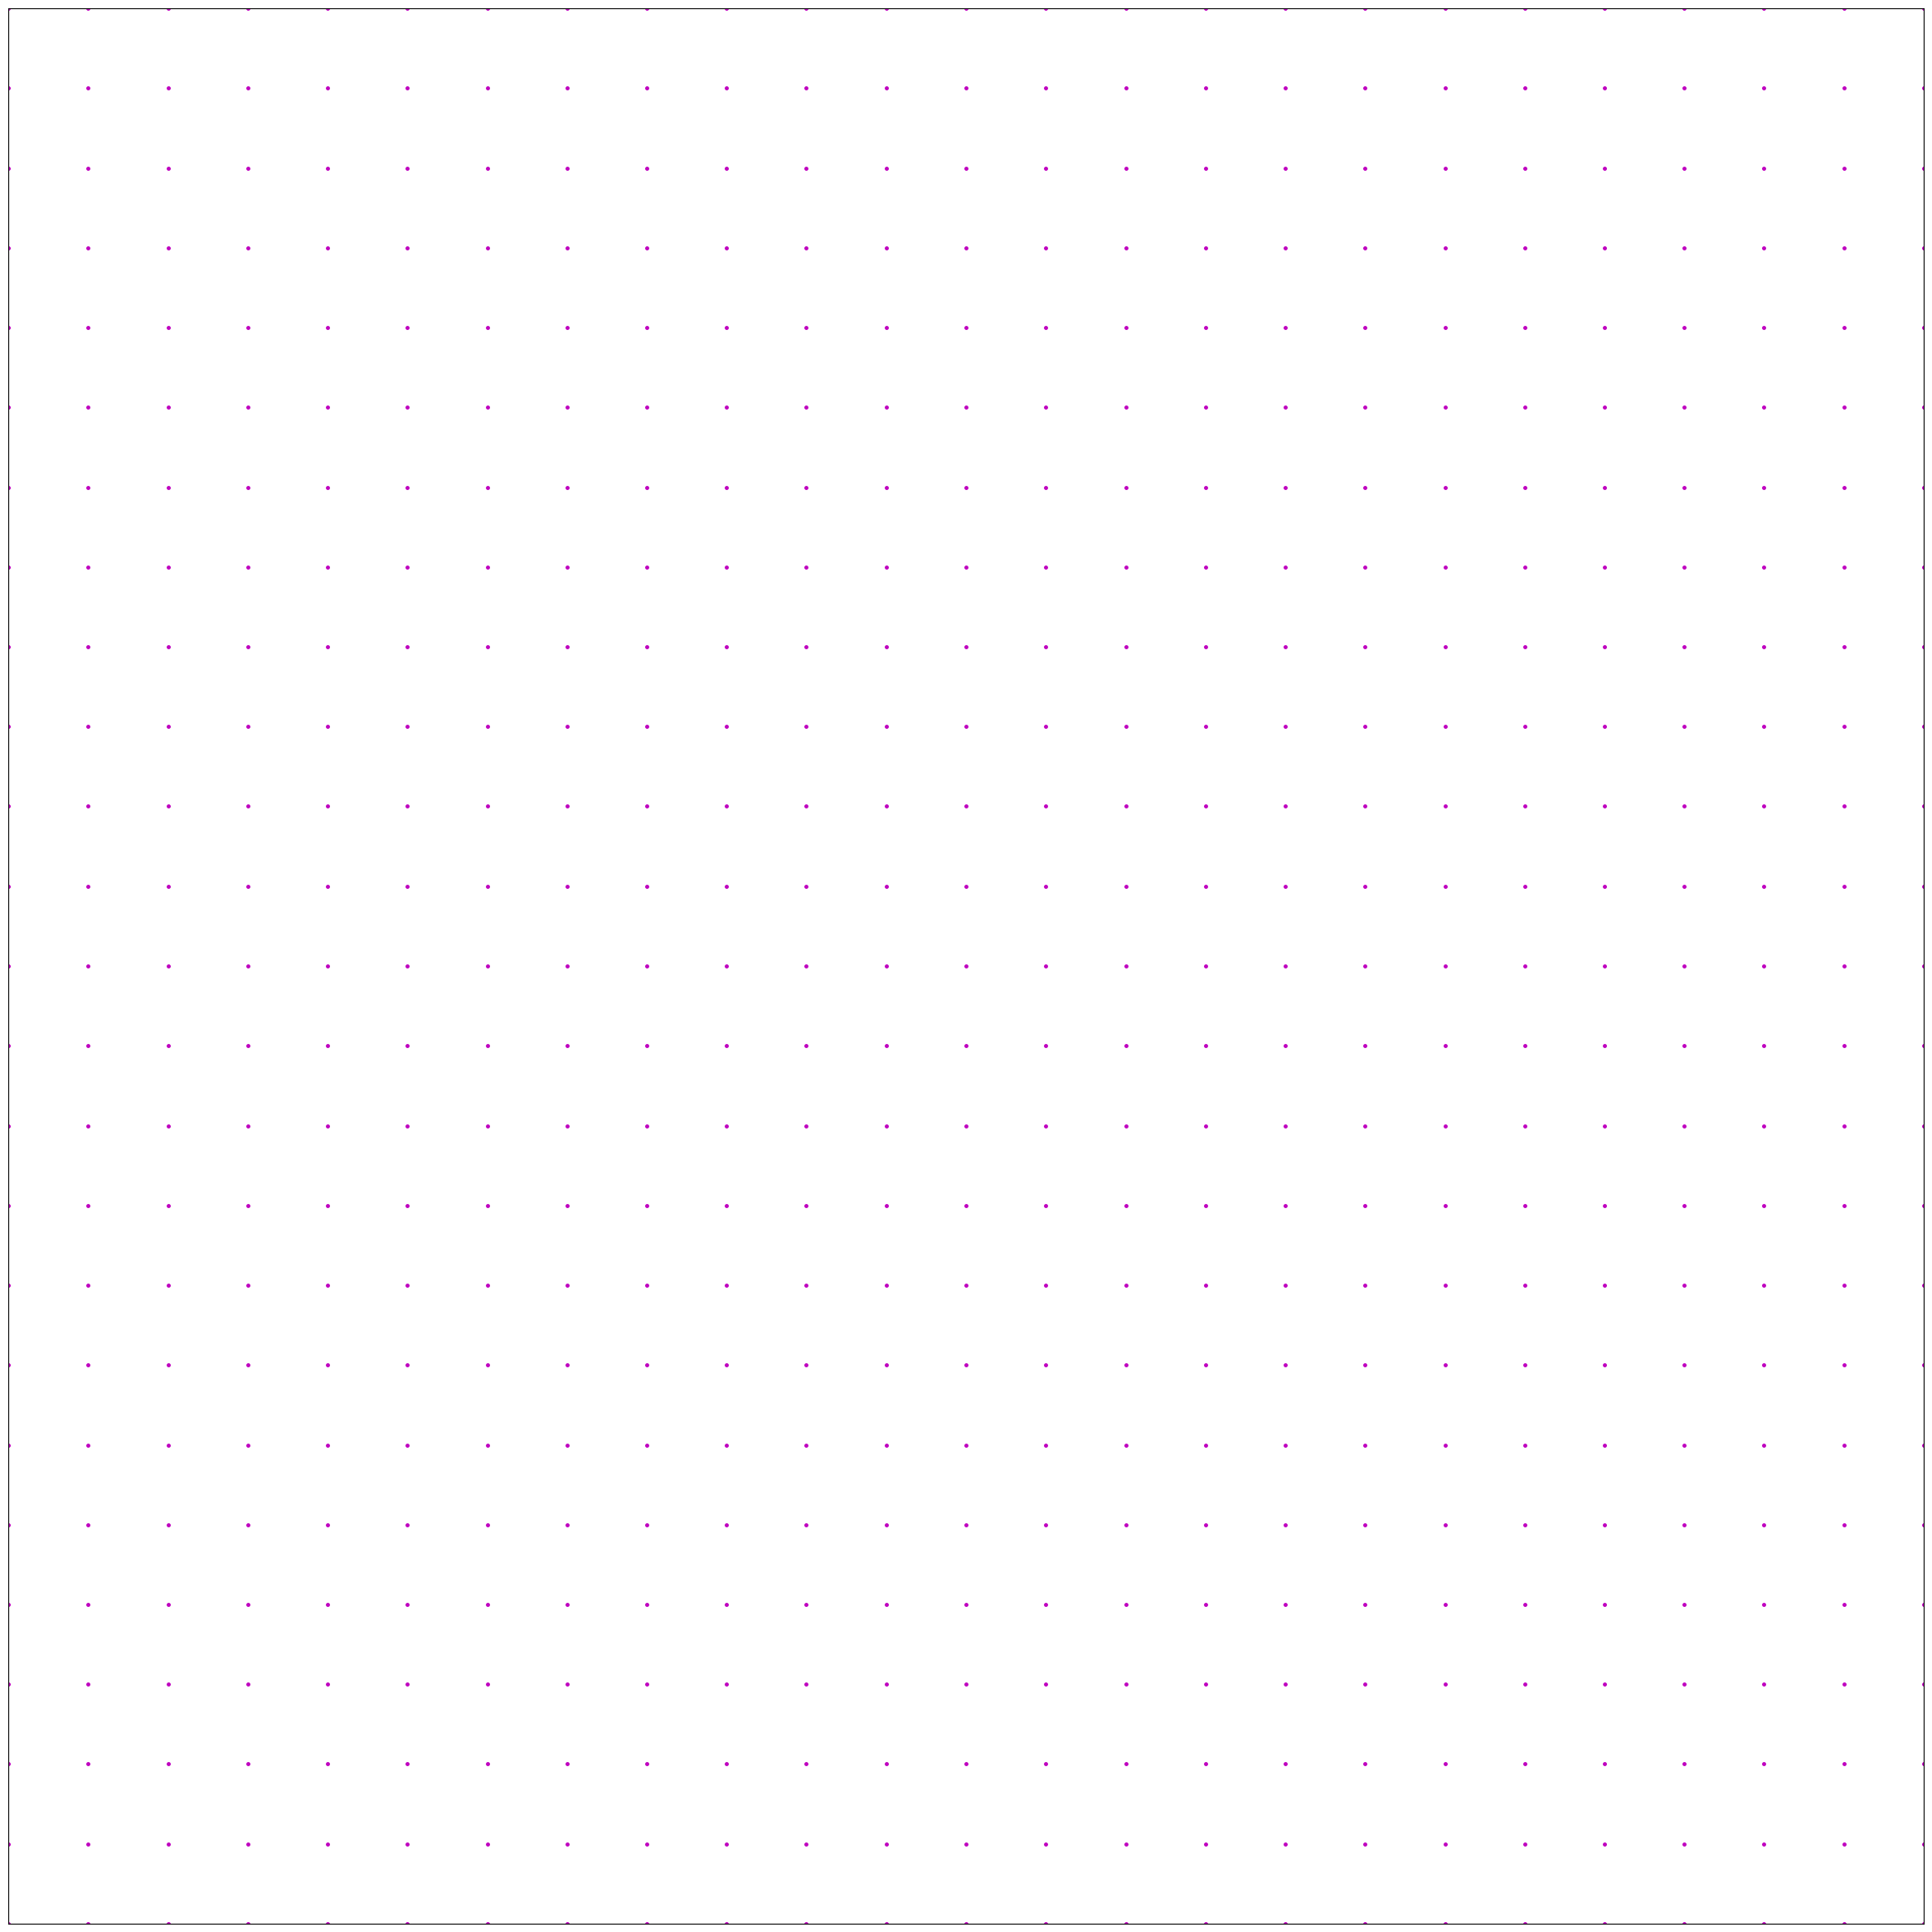

In [11]:
plt.figure(figsize=(60,30))
map = Basemap(llcrnrlat=c1,urcrnrlat=c2,\
            llcrnrlon=d1,urcrnrlon=d2)

map.drawcoastlines()
map.fillcontinents(color='gray',lake_color='white')

x, y = decart(rootgrp.variables['longitude'][:], rootgrp.variables['latitude'][:])

map.plot(x, y, marker='.', color='m', linestyle='None', markersize='5')

In [12]:
# map_1 = Basemap(projection='ortho', 
#               lat_0=0, lon_0=0)

# #Fill the globe with a blue color 
# map_1.drawmapboundary(fill_color='aqua')
# #Fill the continents with the land color
# map_1.fillcontinents(color='coral',lake_color='aqua')

# map_1.drawcoastlines()

# map_1.plot(x, y, marker='D', color='m', linestyle='None', markersize=10)

# plt.show()

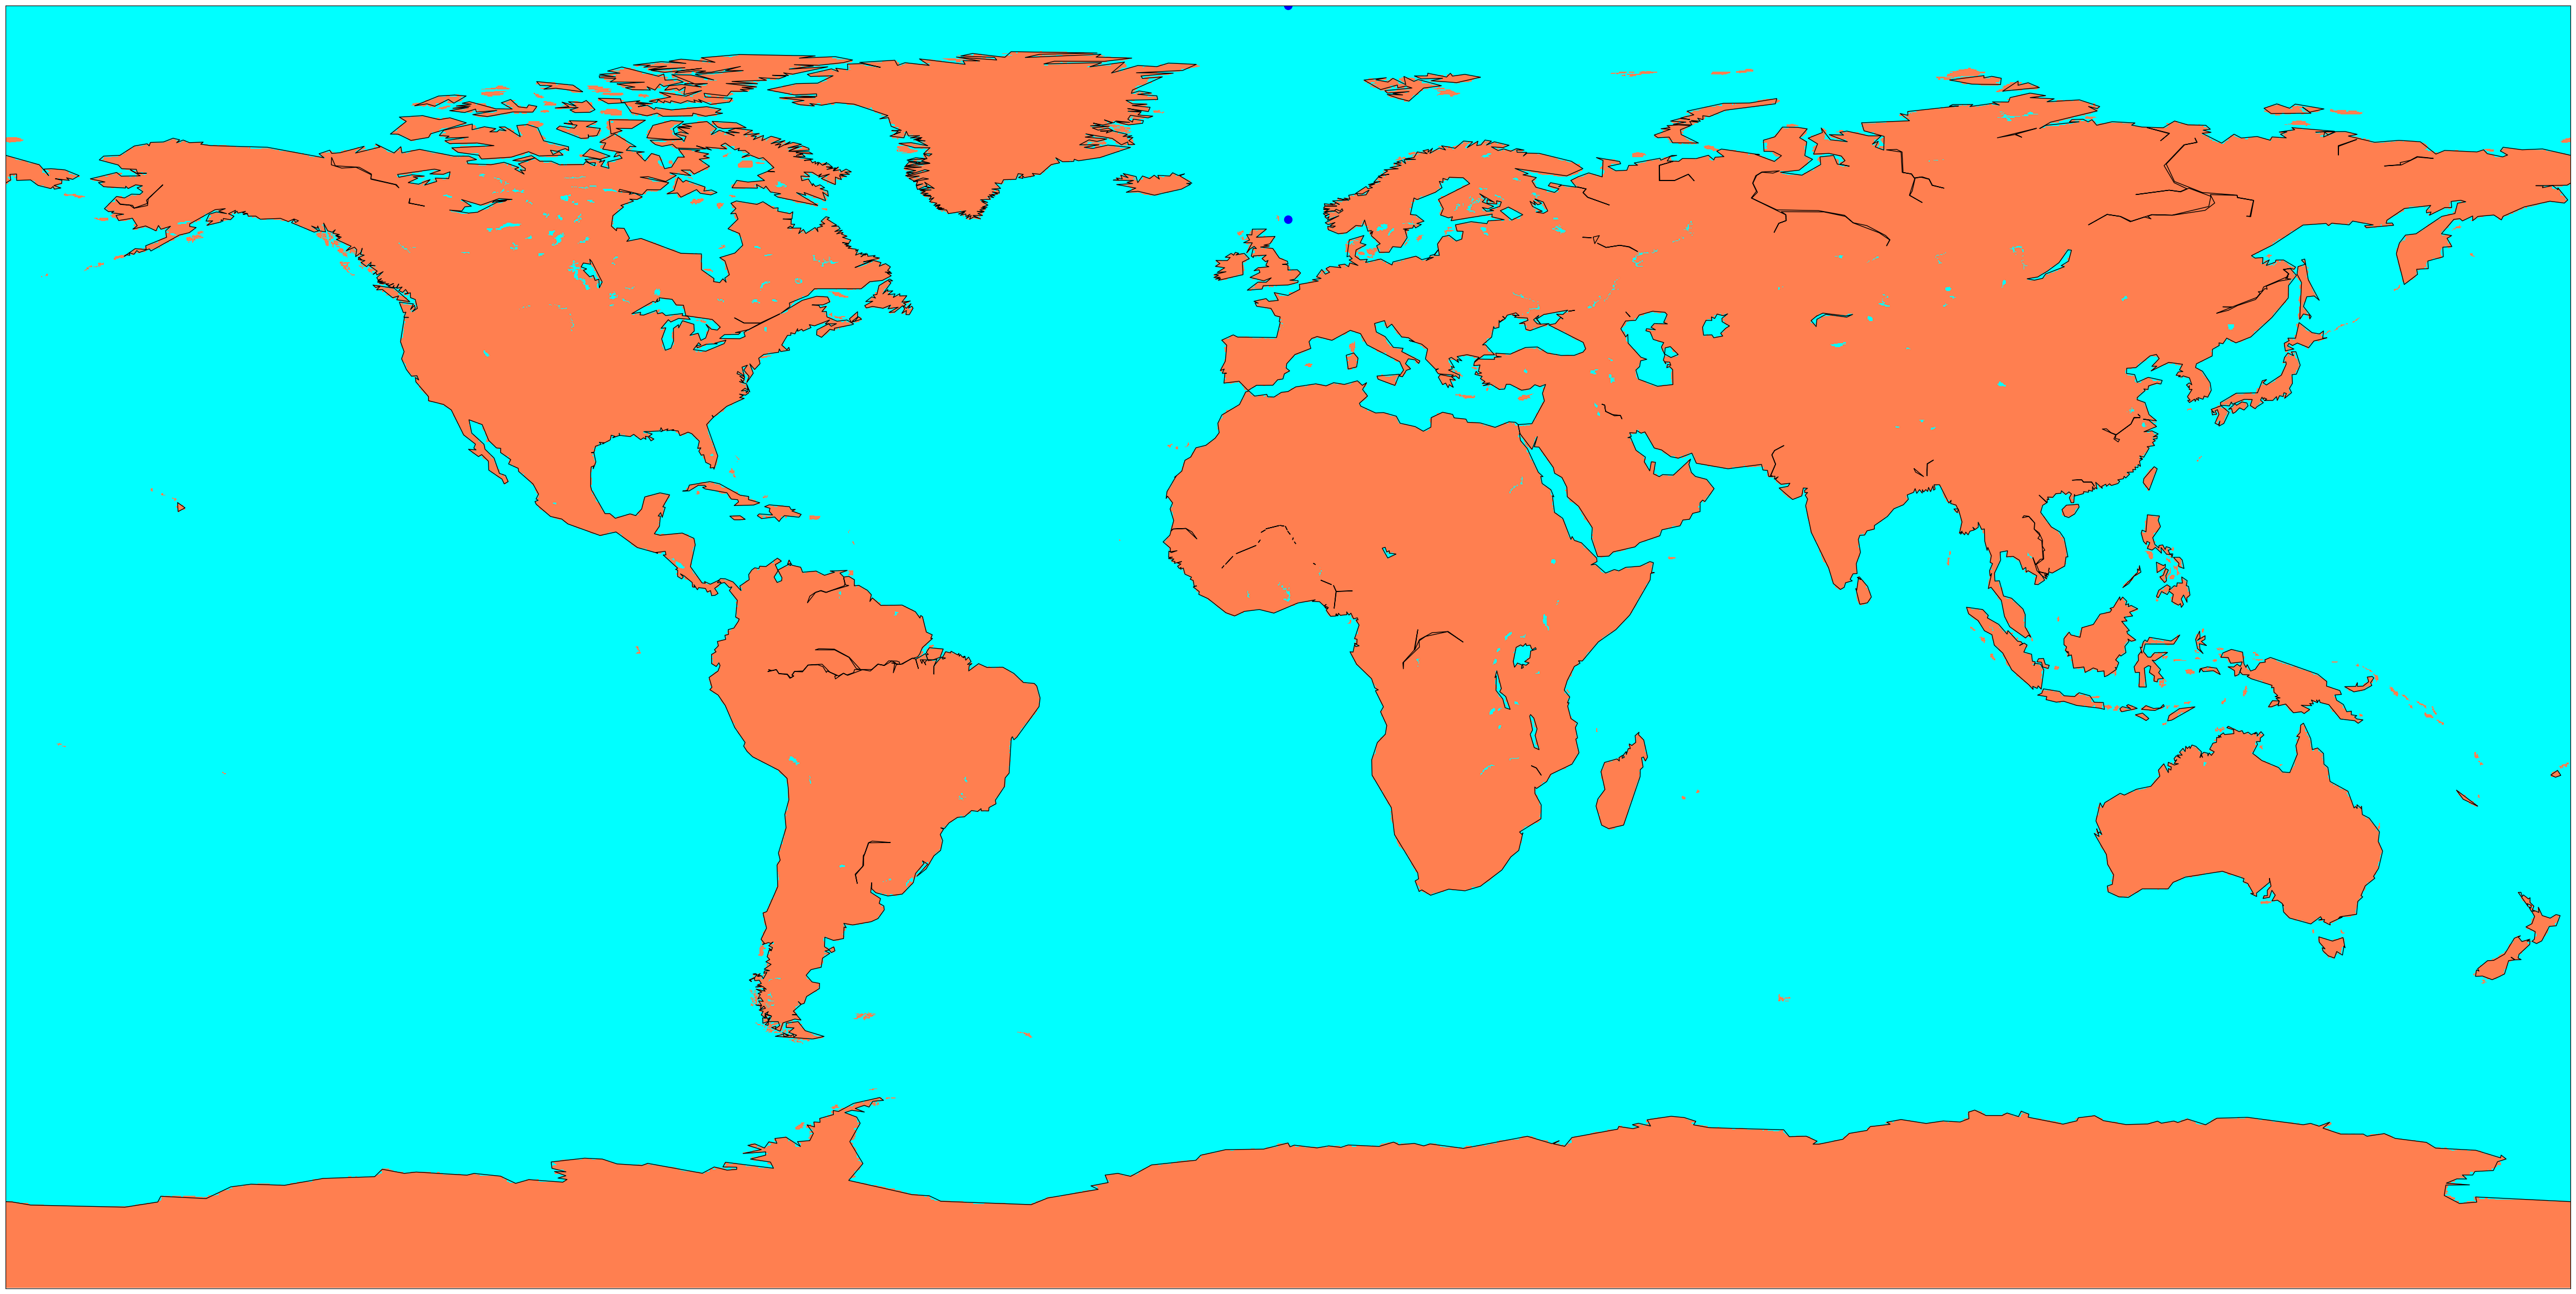

In [13]:
plt.figure(figsize=(60,30))
map_2 = Basemap()

map_2.drawcoastlines()
# map_2.fillcontinents(color='gray',lake_color='white')
map_2.drawlsmask(land_color='coral', ocean_color='aqua')

a_1_3, a_2_3, = 0, 190
b_1_3, b_2_3 = 60, 90

map_2.plot([a_1_3, a_1_3, a_2_3, a_2_3], [b_1_3, b_2_3, b_1_3, b_2_3], marker='.', color='b', linestyle='None', markersize='20')

In [ ]:
map = Basemap(llcrnrlat=b_1_3,urcrnrlat=b_2_3,\
            llcrnrlon=a_1_3,urcrnrlon=a_2_3)
map.drawcoastlines()
map.fillcontinents(color='gray',lake_color='white')

x, y = decart(rootgrp.variables['longitude'][:], rootgrp.variables['latitude'][:])

map.plot(x, y, marker='.', color='m', linestyle='None', markersize='0.05')
plt.figure(figsize=(60,60))
plt.show()

In [ ]:
plt.figure(figsize=(60,30))
# map = Basemap(llcrnrlat=b_1_3,urcrnrlat=b_2_3,\
#             llcrnrlon=a_1_3,urcrnrlon=a_2_3)

map = Basemap(projection='aeqd',
              lon_0 = 95,
              lat_0 = 80,
              width = 8000000,
              height = 8000000)

map.drawcoastlines()
# map.fillcontinents(color='coral',lake_color='aqua')
map.drawlsmask(land_color='coral', ocean_color='aqua')
map.drawparallels(np.arange(-90,90,10))
map.drawmeridians(np.arange(-180,180,20))


# x, y = decart(rootgrp.variables['longitude'][:], rootgrp.variables['latitude'][:])

# map.plot(x, y, marker='.', color='m', linestyle='None', markersize='10')
map.plot([0], [0], marker='.', color='m', linestyle='None', markersize='100')
plt.show()
